In [1]:
!pip install mlxtend
!pip install pyECLAT

In [2]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from pyECLAT import ECLAT

# Набор данных baskets.csv

In [3]:
data1 = pd.read_csv('Data/baskets.csv', header=None)

trans1=[]
for i in range(0, data1.shape[0]):
    trans1.append([str(data1.values[i,j]) for j in range(0, data1.shape[1])])

trans1=np.array(trans1)

t=TransactionEncoder()
data1_df=t.fit_transform(trans1)
data1_df=pd.DataFrame(data1_df, columns=t.columns_, dtype=int)

data1_df.drop('nan', axis=1, inplace=True)
data1_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
freq_items=apriori(data1_df, min_support=0.05, use_colnames=True)
freq_items

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [5]:
res=fpgrowth(data1_df, min_support=0.05, use_colnames=True)
res

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


In [6]:
eclat_instance = ECLAT(data=data1)

In [7]:
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.05, verbose=False)

In [8]:
get_ECLAT_supports

{'chicken': 0.05999200106652446,
 'eggs': 0.17970937208372217,
 'shrimp': 0.07145713904812692,
 'low fat yogurt': 0.07652313024930009,
 'chocolate': 0.1638448206905746,
 'milk': 0.12958272230369283,
 'soup': 0.05052659645380616,
 'spaghetti': 0.17411011865084655,
 'grated cheese': 0.0523930142647647,
 'escalope': 0.0793227569657379,
 'french fries': 0.1709105452606319,
 'turkey': 0.06252499666711105,
 'cake': 0.08105585921877083,
 'mineral water': 0.23836821757099053,
 'olive oil': 0.0658578856152513,
 'pancakes': 0.09505399280095987,
 'green tea': 0.13211571790427942,
 'cooking oil': 0.0510598586855086,
 'tomatoes': 0.06839088121583789,
 'ground beef': 0.09825356619117451,
 'frozen vegetables': 0.09532062391681109,
 'cookies': 0.08038928142914278,
 'burgers': 0.0871883748833489,
 'frozen smoothie': 0.06332489001466471,
 'whole wheat rice': 0.058525529929342755,
 'eggs & mineral water': 0.05092654312758299,
 'chocolate & mineral water': 0.05265964538061592,
 'spaghetti & mineral water'

# Набор данных baskets2.csv

In [9]:
data2 = pd.read_csv('Data/baskets2.csv')
data2 = data2.set_axis(range(32), axis=1, inplace=False)

trans2=[]
for i in range(0, data2.shape[0]):
    trans2.append([str(data2.values[i,j]) for j in range(0, data2.shape[1])])

trans2=np.array(trans2)

t=TransactionEncoder()
data2_df=t.fit_transform(trans2)
data2_df=pd.DataFrame(data2_df, columns=t.columns_, dtype=int)

data2_df.drop('nan', axis=1, inplace=True)
data2_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
freq_items=apriori(data2_df, min_support=0.05, use_colnames=True)
freq_items

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [11]:
res=fpgrowth(data2_df, min_support=0.05, use_colnames=True)
res

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.193493,(other vegetables)
8,0.055414,(butter)
9,0.183935,(rolls/buns)


In [12]:
eclat_instance = ECLAT(data=data2)

In [13]:
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.05, verbose=False)

In [14]:
get_ECLAT_supports

{'tropical fruit': 0.10493136756481952,
 'butter': 0.05541433655312659,
 'coffee': 0.05805795627859685,
 'other vegetables': 0.1934926283680732,
 'yogurt': 0.13950177935943062,
 'whole milk': 0.25551601423487547,
 'shopping bags': 0.09852567361464158,
 'soda': 0.17437722419928825,
 'pastry': 0.08896797153024912,
 'newspapers': 0.07981698017285206,
 'citrus fruit': 0.08276563294356888,
 'frankfurter': 0.058973055414336555,
 'margarine': 0.05856634468734113,
 'brown bread': 0.06487036095577021,
 'canned beer': 0.07768174885612608,
 'fruit/vegetable juice': 0.0722928317234367,
 'bottled beer': 0.08052872394509406,
 'domestic eggs': 0.06344687341128623,
 'root vegetables': 0.10899847483477376,
 'beef': 0.05246568378240976,
 'sausage': 0.09395017793594305,
 'bottled water': 0.11052364006100661,
 'rolls/buns': 0.18393492628368074,
 'napkins': 0.05236400610066091,
 'whipped/sour cream': 0.07168276563294357,
 'pip fruit': 0.07564819522114896,
 'pork': 0.05765124555160142,
 'curd': 0.0532791052

# Набор данных adults.csv

In [15]:
data3 = pd.read_csv('Data/adults.csv', header=None)
data3 = data3[[0, 3, 7, 8, 9, 13]]
data3 = data3.applymap(str)
data3 = data3.set_axis(range(6), axis=1, inplace=False)

t=TransactionEncoder()
data3_df=t.fit_transform(data3.to_numpy())
data3_df=pd.DataFrame(data3_df, columns=t.columns_, dtype=int)

data3_df

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,?,Amer-Indian-Eskimo,Asian-Pac-Islander,...,80,81,82,83,84,85,86,87,88,90
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
freq_items=apriori(data3_df, min_support=0.05, use_colnames=True)
freq_items

,support,itemsets
0,0.164461,( Bachelors)
1,0.095943,( Black)
2,0.330795,( Female)
3,0.322502,( HS-grad)
4,0.405178,( Husband)
...,...,...
113,0.069285,"( White, United-States, Own-child, Male)"
114,0.114738,"( Some-college, United-States, White, Male)"
115,0.063911,"( White, Husband, Bachelors, United-States,..."
116,0.113049,"( White, Husband, HS-grad, United-States, ..."


In [17]:
res=fpgrowth(data3_df, min_support=0.05, use_colnames=True)
res

,support,itemsets
0,0.895857,( United-States)
1,0.854274,( White)
2,0.669205,( Male)
3,0.255060,( Not-in-family)
4,0.164461,( Bachelors)
...,...,...
113,0.081509,"( Female, Unmarried)"
114,0.067995,"( United-States, Unmarried, White)"
115,0.056816,"( Female, Unmarried, White)"
116,0.050613,"( Female, United-States, Unmarried, White)"


In [18]:
eclat_instance = ECLAT(data=data3)

In [20]:
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.05, verbose=False)

In [21]:
get_ECLAT_supports

{' Not-in-family': 0.2550597340376524,
 ' Unmarried': 0.10583213046282362,
 ' Bachelors': 0.16446055096587942,
 ' Husband': 0.40517797364945796,
 ' Female': 0.33079450876815825,
 ' Some-college': 0.22391818433094807,
 ' HS-grad': 0.32250238014802984,
 ' Own-child': 0.1556463253585578,
 ' Masters': 0.05291606523141181,
 ' White': 0.8542735173981143,
 ' Black': 0.0959429992936335,
 ' Male': 0.6692054912318418,
 ' United-States': 0.895857006848684,
 ' Not-in-family &  Bachelors': 0.05113479315745831,
 ' Not-in-family &  Female': 0.11900740149258315,
 ' Not-in-family &  Some-college': 0.055188722705076625,
 ' Not-in-family &  HS-grad': 0.07730106569208563,
 ' Not-in-family &  White': 0.2188200608089432,
 ' Not-in-family &  Male': 0.13605233254506927,
 ' Not-in-family &  United-States': 0.23119683056417187,
 ' Unmarried &  Female': 0.08150855317711372,
 ' Unmarried &  White': 0.07650256441755475,
 ' Unmarried &  United-States': 0.09314824483277541,
 ' Bachelors &  Husband': 0.07472129234360

# Визуализация

In [22]:
import time
support=[0.01, 0.03, 0.05, 0.1, 0.15, 0.2]
time_apriori=[]
time_fpgrowth=[]

for i in support:
    t1=time.time()
    apriori(data2_df,min_support=i)
    t2=time.time()
    time_apriori.append((t2-t1)*1000)
    
    t1=time.time()
    fpgrowth(data2_df, min_support=i)
    t2=time.time()
    time_fpgrowth.append((t2-t1)*1000)

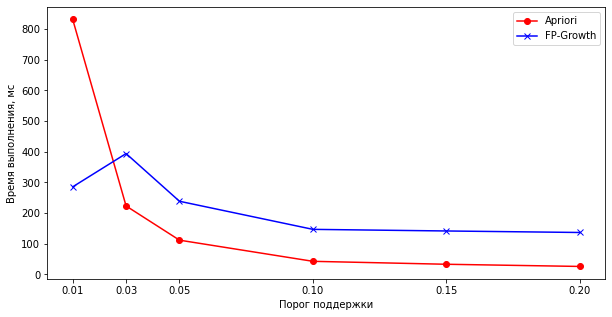

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(support, time_apriori, 'r', marker='o', label='Apriori')
plt.plot(support, time_fpgrowth, 'b', marker='x', label='FP‑Growth')
plt.legend()

plt.xticks(support)

plt.xlabel("Порог поддержки")
plt.ylabel("Время выполнения, мс")

plt.show()

In [24]:
import time
support=[0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
time_apriori=[]
time_fpgrowth=[]
time_eclat=[]

count_apriori=[]
count_fpgrowth=[]
count_eclat=[]

max_apriori=[]
max_fpgrowth=[]
max_eclat=[]

count_each_apriori = []
count_each_fpgrowth = []
count_each_eclat = []

eclat_instance = ECLAT(data=data2)

for i in support:
    t1=time.time()
    apriori_indexses = apriori(data2_df,min_support=i)
    t2=time.time()
    time_apriori.append((t2-t1)*1000)
    
    t1=time.time()
    fpgrowth_indexses = fpgrowth(data2_df, min_support=i)
    t2=time.time()
    time_fpgrowth.append((t2-t1)*1000)
    
    t1=time.time()
    eclat_indexes, eclat_supports = eclat_instance.fit(min_support=i, verbose=False)
    t2=time.time()
    time_eclat.append((t2-t1)*1000)
    
    count_apriori.append(apriori_indexses.shape[0])
    count_fpgrowth.append(fpgrowth_indexses.shape[0])
    count_eclat.append(len(eclat_supports.keys()))
    
    counter = {}
    for row in (apriori_indexses.iloc[:,1]):
        if (len(row) in counter):
            counter[len(row)] += 1
        else:
            counter[len(row)] = 1
    count_each_apriori.append(counter)
    max_apriori.append(max(counter.keys())) if (len(counter.keys()) > 0) else max_apriori.append(0)
    
    counter = {}
    for row in (fpgrowth_indexses.iloc[:,1]):
        if (len(row) in counter):
            counter[len(row)] += 1
        else:
            counter[len(row)] = 1
    count_each_fpgrowth.append(counter)
    max_fpgrowth.append(max(counter.keys())) if (len(counter.keys()) > 0) else max_fpgrowth.append(0)
    
    counter = {}
    for row in (eclat_supports.keys()):
        if (len(row.split('&')) in counter):
            counter[len(row.split('&'))] += 1
        else:
            counter[len(row.split('&'))] = 1
    count_each_eclat.append(counter)
    max_eclat.append(max(counter.keys())) if (len(counter.keys()) > 0) else max_eclat.append(0)

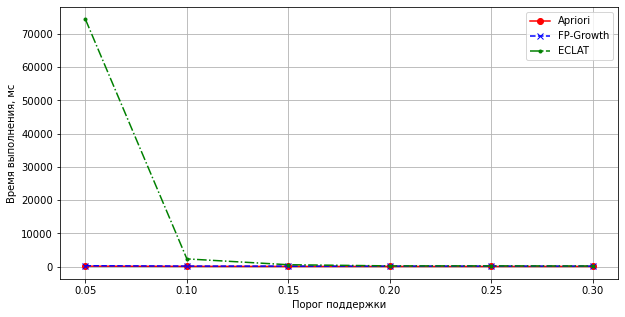

In [25]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(support, time_apriori, 'r', marker='o', label='Apriori')
plt.plot(support, time_fpgrowth, 'b--', marker='x', label='FP‑Growth')
plt.plot(support, time_eclat, 'g-.', marker='.', label='ECLAT')
plt.legend()

plt.xticks(support)

plt.xlabel("Порог поддержки")
plt.ylabel("Время выполнения, мс")

plt.show()

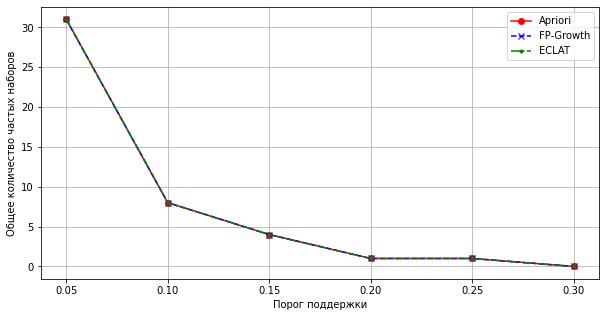

In [26]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(support, count_apriori, 'r', marker='o', label='Apriori')
plt.plot(support, count_fpgrowth, 'b--', marker='x', label='FP‑Growth')
plt.plot(support, count_eclat, 'g-.', marker='.', label='ECLAT')
plt.legend()

plt.xticks(support)

plt.xlabel("Порог поддержки")
plt.ylabel("Общее количество частых наборов")

plt.show()

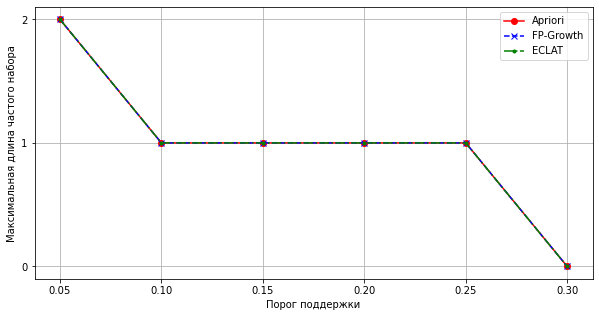

In [27]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(support, max_apriori, 'r', marker='o', label='Apriori')
plt.plot(support, max_fpgrowth, 'b--', marker='x', label='FP‑Growth')
plt.plot(support, max_eclat, 'g-.', marker='.', label='ECLAT')
plt.legend()

plt.xticks(support)
plt.yticks(range(0, max(max(max_apriori), max(max_fpgrowth), max(max_eclat)) + 1))

plt.xlabel("Порог поддержки")
plt.ylabel("Максимальная длина частого набора")

plt.show()

In [28]:
for i in range(0, len(support)):
    print('Пороговое значение поддержки %d%%:' % (support[i] * 100))
    
    print('\tApriori:')
    for key in count_each_apriori[i].keys():
        print('\t\tКол-во наборов из %d эл.: %d' % (key, count_each_apriori[i][key]))
    
    print('\tFP-Growth:')
    for key in count_each_fpgrowth[i].keys():
        print('\t\tКол-во наборов из %d эл.: %d' % (key, count_each_fpgrowth[i][key]))
    
    print('\tECLAT:')
    for key in count_each_eclat[i].keys():
        print('\t\tКол-во наборов из %d эл.: %d' % (key, count_each_eclat[i][key]))
    
    print()

Пороговое значение поддержки 5%:
	Apriori:
		Кол-во наборов из 1 эл.: 28
		Кол-во наборов из 2 эл.: 3
	FP-Growth:
		Кол-во наборов из 1 эл.: 28
		Кол-во наборов из 2 эл.: 3
	ECLAT:
		Кол-во наборов из 1 эл.: 28
		Кол-во наборов из 2 эл.: 3

Пороговое значение поддержки 10%:
	Apriori:
		Кол-во наборов из 1 эл.: 8
	FP-Growth:
		Кол-во наборов из 1 эл.: 8
	ECLAT:
		Кол-во наборов из 1 эл.: 8

Пороговое значение поддержки 15%:
	Apriori:
		Кол-во наборов из 1 эл.: 4
	FP-Growth:
		Кол-во наборов из 1 эл.: 4
	ECLAT:
		Кол-во наборов из 1 эл.: 4

Пороговое значение поддержки 20%:
	Apriori:
		Кол-во наборов из 1 эл.: 1
	FP-Growth:
		Кол-во наборов из 1 эл.: 1
	ECLAT:
		Кол-во наборов из 1 эл.: 1

Пороговое значение поддержки 25%:
	Apriori:
		Кол-во наборов из 1 эл.: 1
	FP-Growth:
		Кол-во наборов из 1 эл.: 1
	ECLAT:
		Кол-во наборов из 1 эл.: 1

Пороговое значение поддержки 30%:
	Apriori:
	FP-Growth:
	ECLAT:

